In [5]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [6]:
def confidence_interval(data, percentage=95):
    if percentage == 95:
        z = 1.96
    else:
        raise(ValueError("frero..."))
    
    std = np.std(data)
    N = data.shape[0]

    diff = z * std/np.sqrt(N)

    return diff

# bdd 1

In [72]:
bdd = pd.read_csv("/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/summary/bdd_2023-09-01_no_earlystopping.csv", index_col=0)
bdd = bdd.sort_values(by=['best_test_auc'], ascending=False)

In [73]:
len(bdd)

60

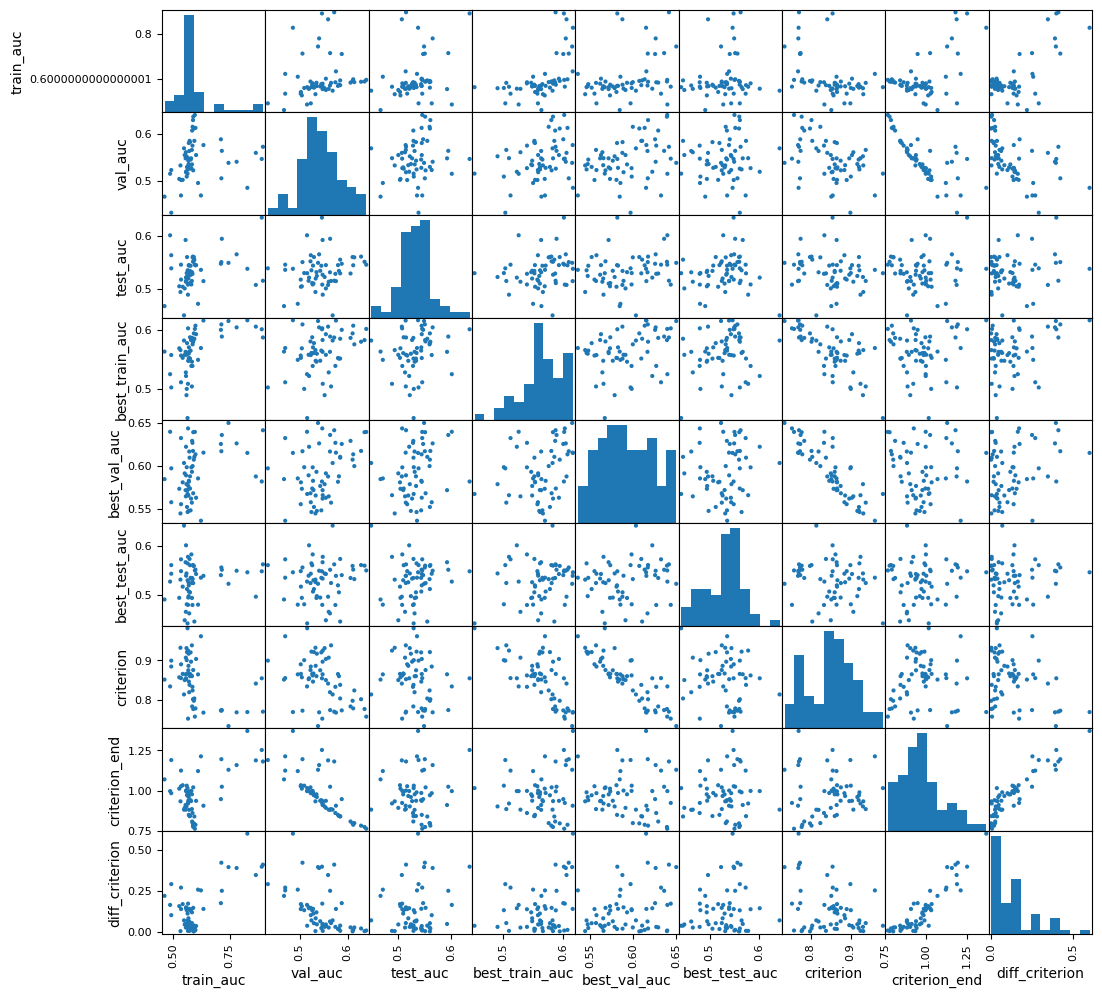

In [8]:
bdd["criterion"] = abs(bdd["best_val_auc"] - bdd["best_train_auc"]) + 2*(1-bdd["best_val_auc"])
bdd["criterion_end"] = abs(bdd["val_auc"] - bdd["train_auc"]) + 2*(1-bdd["val_auc"])
bdd["diff_criterion"] = abs(bdd["criterion"]-bdd["criterion_end"])
bdd["diff_best"] = np.log(abs(bdd["best_val_auc"] - bdd["best_train_auc"]))
bdd["diff_end"] = np.log(abs(bdd["val_auc"] - bdd["train_auc"])+0.01)
bdd["criterion2"] = np.log(abs(bdd["best_val_auc"] - bdd["best_train_auc"])) + np.log(0.7-bdd["best_val_auc"])
bdd["diff"] = np.log(abs(bdd["best_train_auc"] - 0.55))
obj = pd.plotting.scatter_matrix(bdd[['train_auc', 'val_auc', 'test_auc', 'best_train_auc', 'best_val_auc', 'best_test_auc', 'criterion', 'criterion_end', 'diff_criterion']],
                                 figsize=(12,12),
                                 alpha=1.0)

In [9]:
# bdd[bdd['best_test_auc']>0.6]['model_path'].iat[0]

Text(0, 0.5, 'best_test_auc')

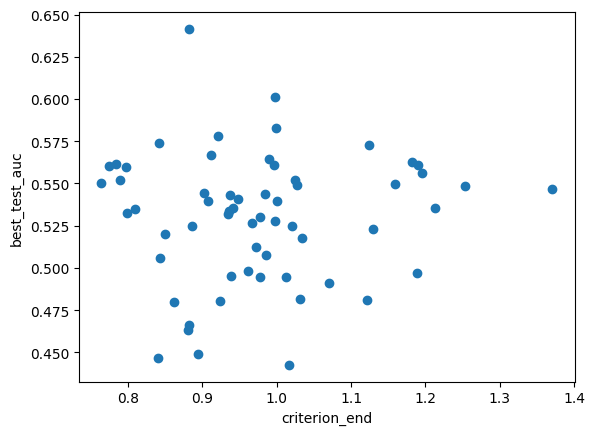

In [10]:
plt.scatter(bdd["criterion_end"], bdd.best_test_auc)
plt.xlabel("criterion_end")
plt.ylabel("best_test_auc")

(0.75, 1.1)

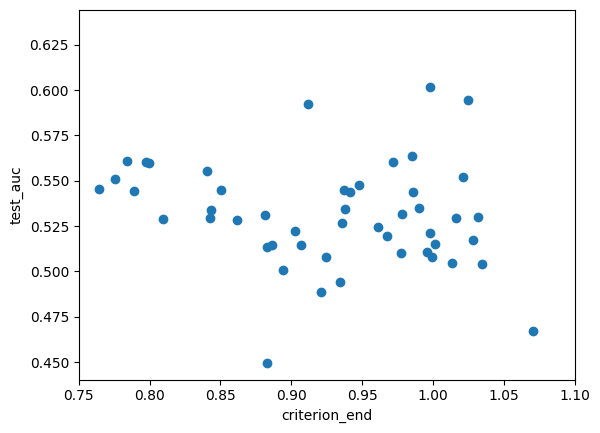

In [11]:
plt.scatter(bdd["criterion_end"], bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")
plt.xlim((0.75,1.1))

In [65]:
quantile = []
test_auc = []
quantile_x = np.arange(0.05,1,0.05)
for q in quantile_x:
    one_quantile = bdd['criterion_end'].quantile(q=q)
    quantile.append(one_quantile)
    test_auc.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc'].mean())

Text(0, 0.5, 'test_auc')

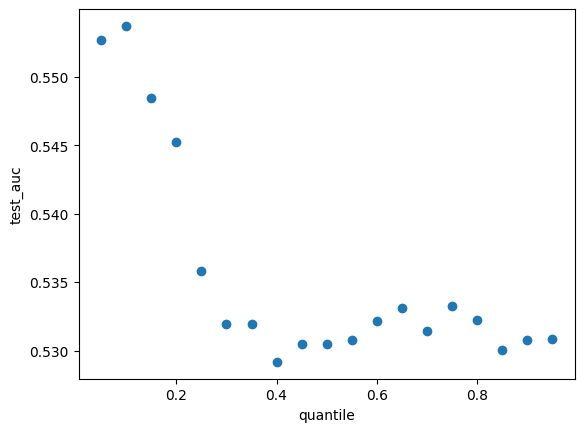

In [66]:
plt.scatter(quantile_x, test_auc)
plt.xlabel("quantile")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

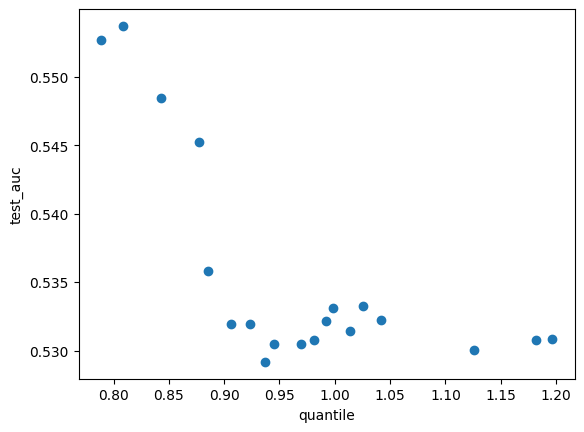

In [70]:
plt.scatter(quantile, test_auc)
plt.xlabel("quantile")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_test_auc')

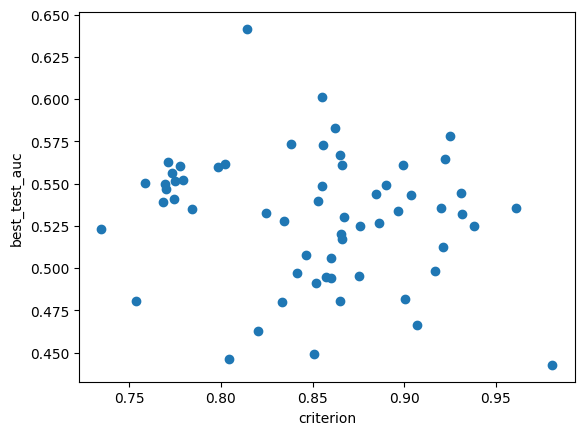

In [69]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

In [67]:
best_quantile = []
best_test_auc = []
for q in quantile_x:
    one_quantile = bdd['criterion'].quantile(q=q)
    best_quantile.append(one_quantile)
    best_test_auc.append(bdd[bdd['criterion'] < one_quantile]['best_test_auc'].mean())

Text(0, 0.5, 'best_test_auc')

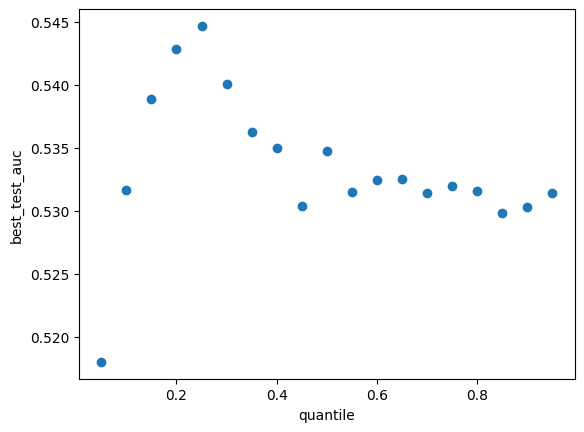

In [68]:
plt.scatter(quantile_x, best_test_auc)
plt.xlabel("quantile")
plt.ylabel("best_test_auc")

(0.75, 0.9)

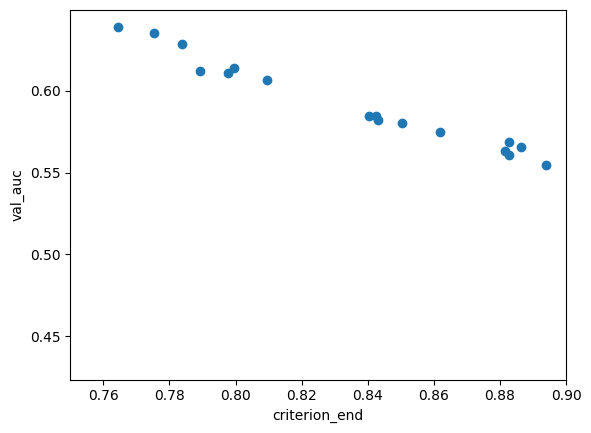

In [12]:
plt.scatter(bdd["criterion_end"], bdd.val_auc)
plt.xlabel("criterion_end")
plt.ylabel("val_auc")
plt.xlim((0.75,0.9))

(0.45, 0.7)

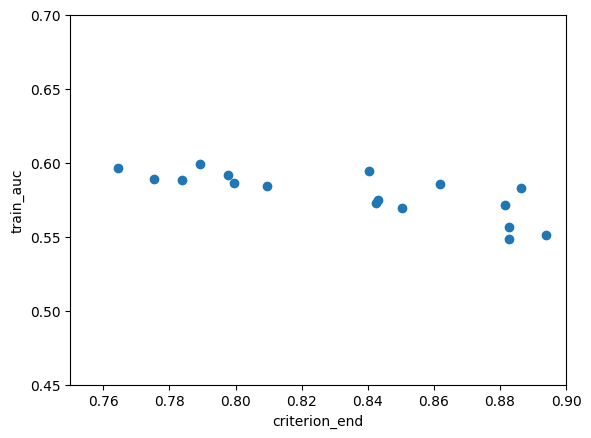

In [13]:
plt.scatter(bdd["criterion_end"], bdd.train_auc)
plt.xlabel("criterion_end")
plt.ylabel("train_auc")
plt.xlim((0.75,0.9))
plt.ylim((0.45,0.7))

In [14]:
bdd.sort_values(by=['test_auc'], ascending=False)

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,sigma_noise,train_loss,criterion,criterion_end,diff_criterion,diff_best,diff_end,criterion2,diff
52,/volatile2/jc225751/Runs/61_classifier_regress...,0.892621,0.546645,0.634921,0.601010,0.581997,0.548629,0.199964,0.907358,0.000402,0.070018,122.142357,0.855019,1.252686,0.397667,-3.962641,-1.032893,-6.099683,-2.975742
5,/volatile2/jc225751/Runs/61_classifier_regress...,0.486809,0.515548,0.601443,0.525405,0.640098,0.527706,0.164181,0.984609,0.000962,0.154731,138.605408,0.834497,0.997642,0.163145,-2.165490,-3.250914,-4.980539,-3.705192
42,/volatile2/jc225751/Runs/61_classifier_regress...,0.715818,0.563666,0.594805,0.588705,0.636334,0.551804,0.177365,0.713885,0.000828,0.041859,133.885925,0.774961,1.024820,0.249859,-3.044325,-1.819221,-5.798428,-3.251775
21,/volatile2/jc225751/Runs/61_classifier_regress...,0.555406,0.547954,0.592496,0.562993,0.571849,0.567100,0.167347,0.947920,0.000543,0.242389,138.568359,0.865158,0.911544,0.046386,-4.726607,-4.048302,-6.781156,-4.343348
54,/volatile2/jc225751/Runs/61_classifier_regress...,0.781275,0.540753,0.565368,0.604172,0.626514,0.549784,0.173081,0.755953,0.000627,0.144692,129.585144,0.769314,1.159016,0.389702,-3.801290,-1.384208,-6.411950,-2.915591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,/volatile2/jc225751/Runs/61_classifier_regress...,0.532653,0.533061,0.493939,0.565945,0.544681,0.531746,0.172357,0.983010,0.000606,0.393535,138.631058,0.931902,0.934286,0.002384,-3.850731,-4.565250,-5.713004,-4.138607
1,/volatile2/jc225751/Runs/61_classifier_regress...,0.565870,0.548282,0.488889,0.509194,0.565957,0.578066,0.182358,0.736130,0.000421,0.369545,138.832245,0.924848,0.921025,0.003823,-2.868868,-3.590359,-4.878466,-3.198933
29,/volatile2/jc225751/Runs/61_classifier_regress...,0.610504,0.496236,0.471573,0.549525,0.585597,0.480808,0.181677,0.757719,0.000495,0.144937,138.370605,0.864878,1.121797,0.256919,-3.322214,-2.085309,-5.490246,-7.651166
2,/volatile2/jc225751/Runs/61_classifier_regress...,0.461983,0.467594,0.467244,0.563421,0.584779,0.491342,0.198529,0.995329,0.000516,0.101658,138.669815,0.851800,1.070423,0.218623,-3.846332,-4.159797,-6.007236,-4.310926


Text(0, 0.5, 'best_test_auc')

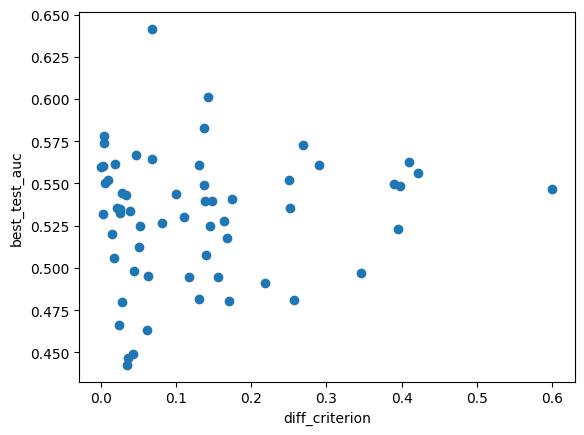

In [15]:
plt.scatter(bdd["diff_criterion"], bdd.best_test_auc)
plt.xlabel("diff_criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

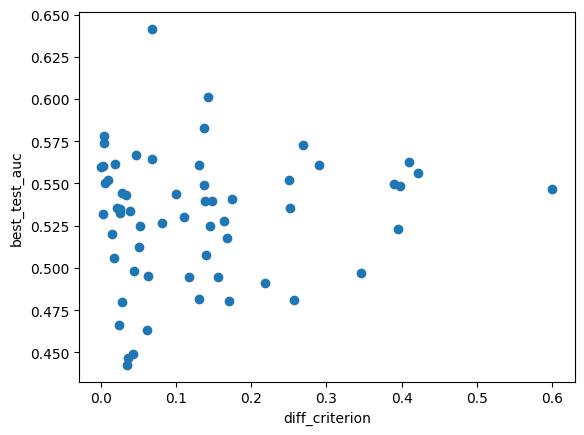

In [16]:
plt.scatter(bdd["diff_criterion"], bdd.best_test_auc)
plt.xlabel("diff_criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

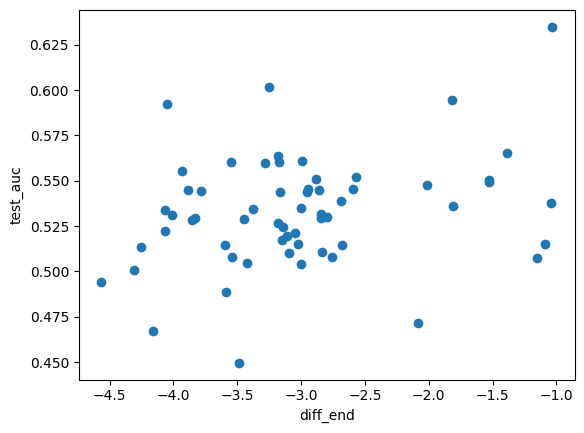

In [17]:
plt.scatter(bdd["diff_end"], bdd.test_auc)
plt.xlabel("diff_end")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_test_auc')

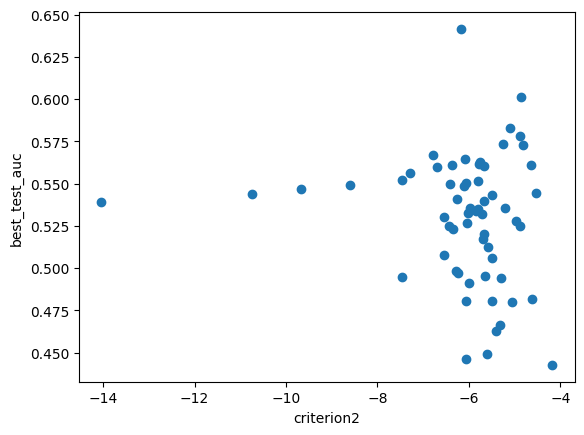

In [18]:
plt.scatter(bdd["criterion2"], bdd.best_test_auc)
plt.xlabel("criterion2")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

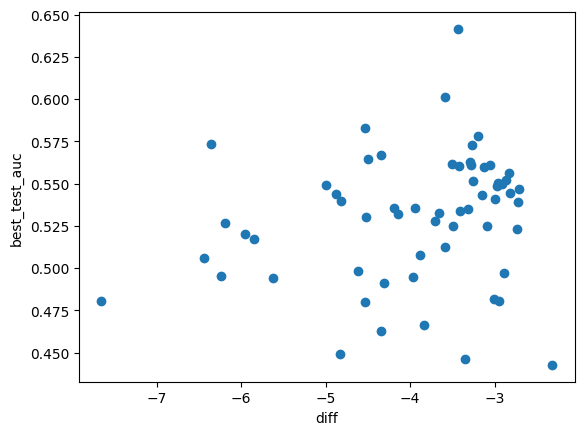

In [19]:
plt.scatter(bdd["diff"], bdd.best_test_auc)
plt.xlabel("diff")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

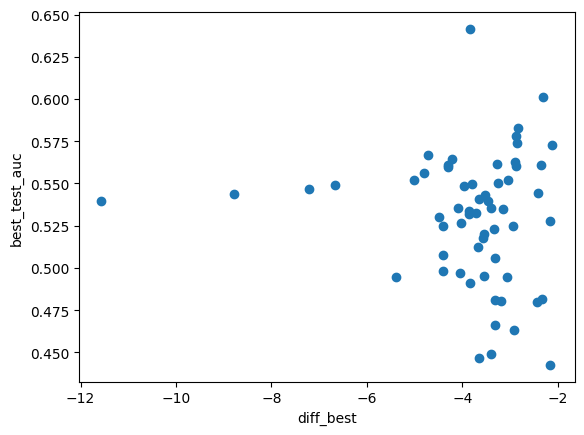

In [20]:
plt.scatter(bdd["diff_best"], bdd.best_test_auc)
plt.xlabel("diff_best")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_train_auc')

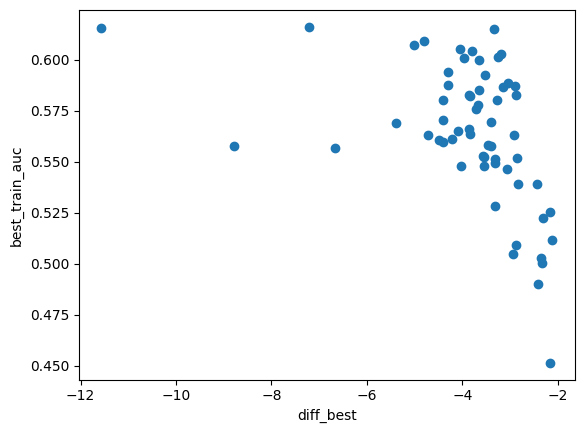

In [21]:
plt.scatter(bdd["diff_best"], bdd.best_train_auc)
plt.xlabel("diff_best")
plt.ylabel("best_train_auc")

(0.4, 0.65)

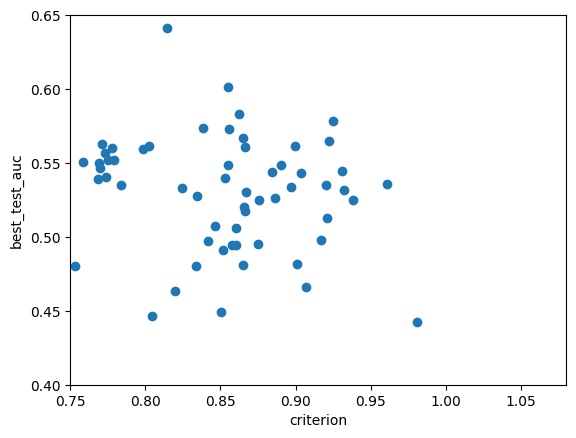

In [22]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")
plt.ylim((0.35,0.65))
plt.xlim((0.75,1.08))
plt.ylim((0.4,0.65))

(0.5, 0.65)

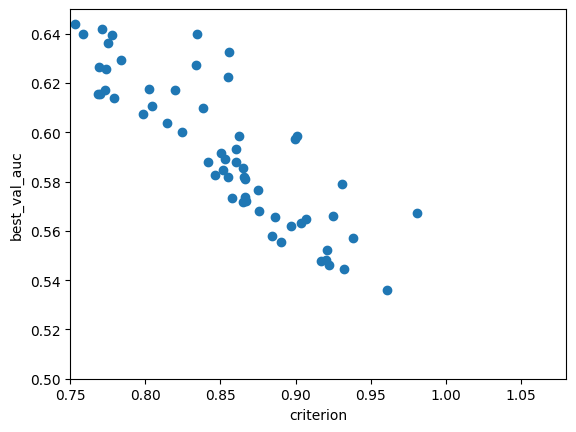

In [23]:
plt.scatter(bdd.criterion, bdd.best_val_auc)
plt.xlabel("criterion")
plt.ylabel("best_val_auc")
plt.xlim((0.75,1.08))
plt.ylim((0.5,0.65))

(0.75, 0.9)

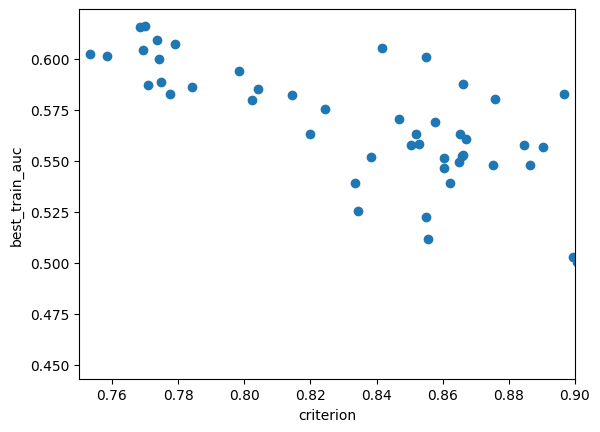

In [24]:
plt.scatter(bdd.criterion, bdd.best_train_auc)
plt.xlabel("criterion")
plt.ylabel("best_train_auc")
plt.xlim((0.75,0.9))

(0.75, 0.9)

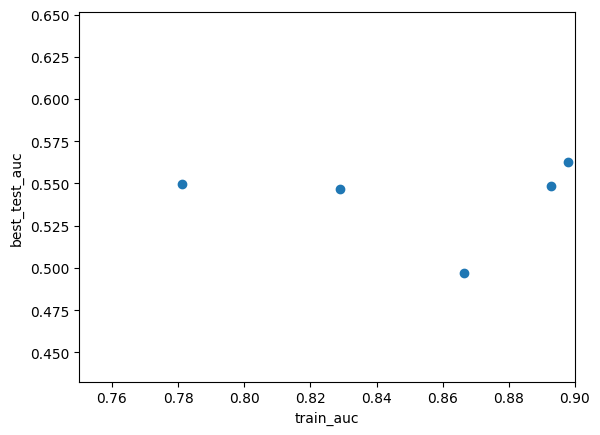

In [25]:
plt.scatter(bdd.train_auc, bdd.best_test_auc)
plt.xlabel("train_auc")
plt.ylabel("best_test_auc")
plt.xlim((0.75,0.9))

Text(0, 0.5, 'test_auc')

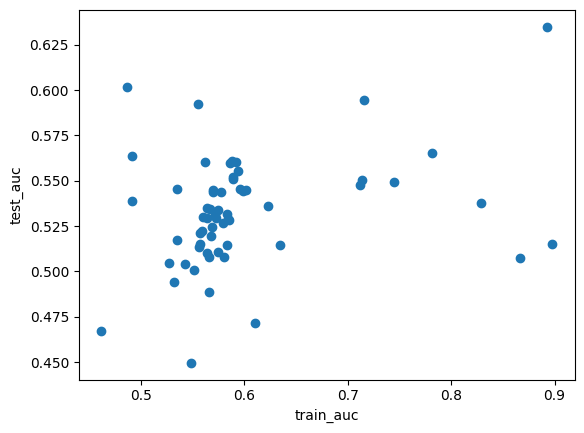

In [26]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

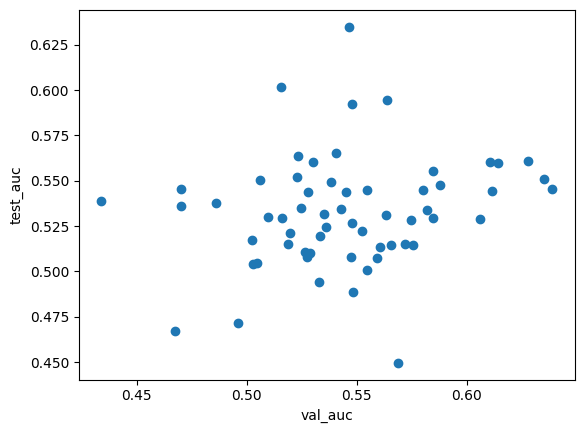

In [27]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_test_auc')

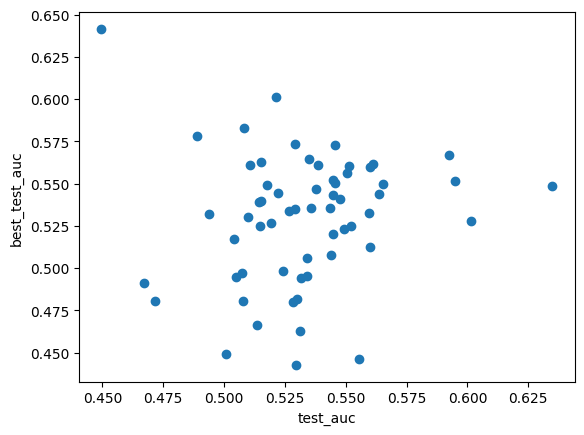

In [28]:
plt.scatter(bdd.test_auc, bdd.best_test_auc)
plt.xlabel("test_auc")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_train_auc')

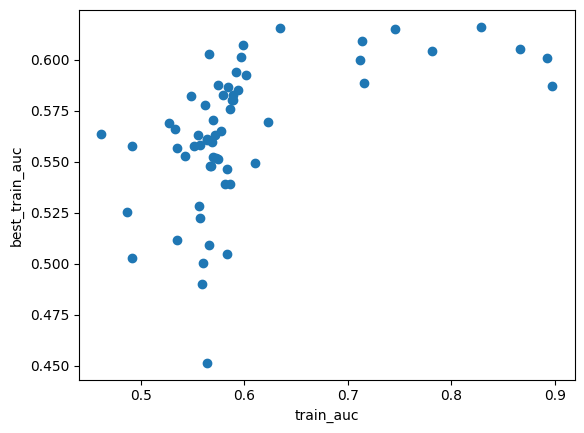

In [29]:
plt.scatter(bdd.train_auc, bdd.best_train_auc)
plt.xlabel("train_auc")
plt.ylabel("best_train_auc")

Text(0, 0.5, 'best_val_auc')

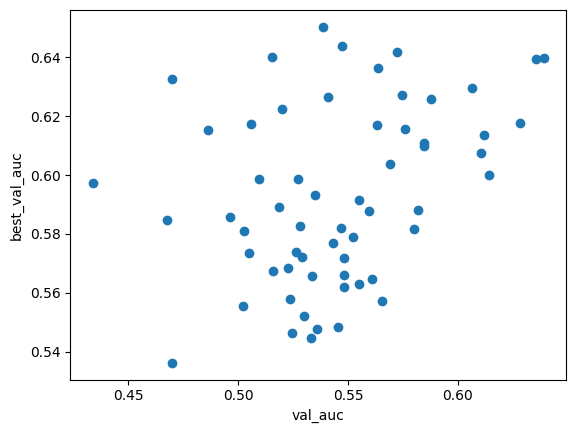

In [30]:
plt.scatter(bdd.val_auc, bdd.best_val_auc)
plt.xlabel("val_auc")
plt.ylabel("best_val_auc")

Text(0, 0.5, 'test_auc')

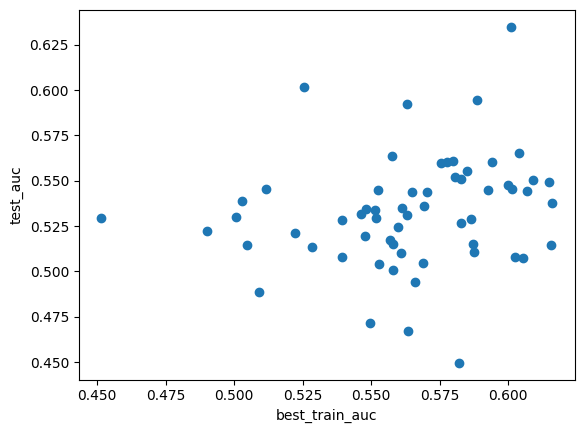

In [31]:
plt.scatter(bdd.best_train_auc, bdd.test_auc)
plt.xlabel("best_train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_val_auc')

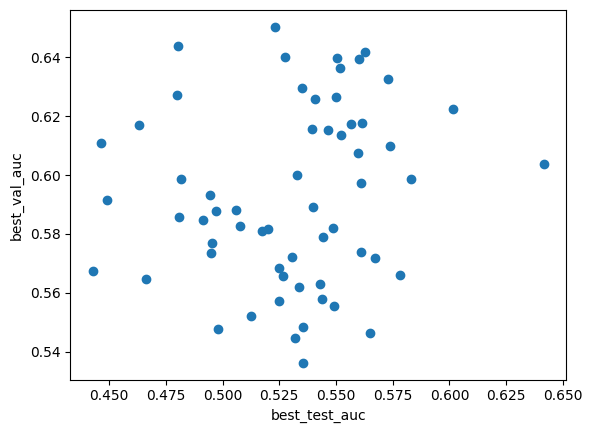

In [32]:
plt.scatter(bdd.best_test_auc, bdd.best_val_auc)
plt.xlabel("best_test_auc")
plt.ylabel("best_val_auc")

(0.4, 0.65)

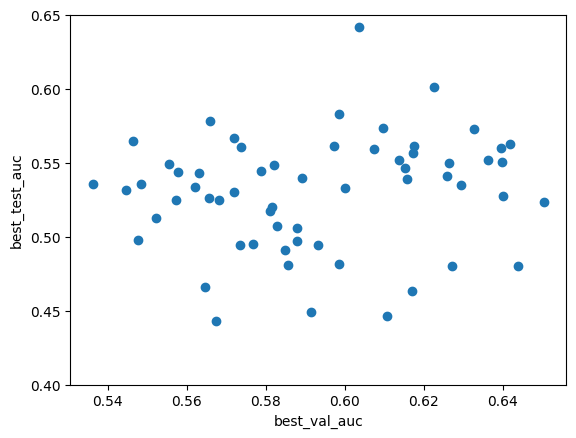

In [33]:
plt.scatter(bdd.best_val_auc, bdd.best_test_auc)
plt.xlabel("best_val_auc")
plt.ylabel("best_test_auc")
plt.ylim((0.4,0.65))

(0.4, 0.65)

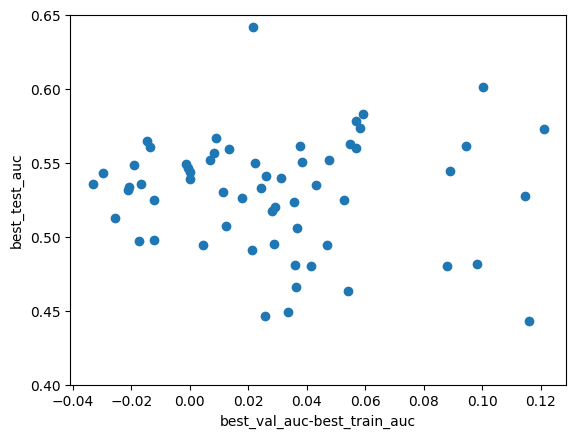

In [34]:
plt.scatter(bdd.best_val_auc-bdd.best_train_auc, bdd.best_test_auc)
plt.xlabel("best_val_auc-best_train_auc")
plt.ylabel("best_test_auc")
plt.ylim((0.4,0.65))

Text(0, 0.5, 'best_test_auc')

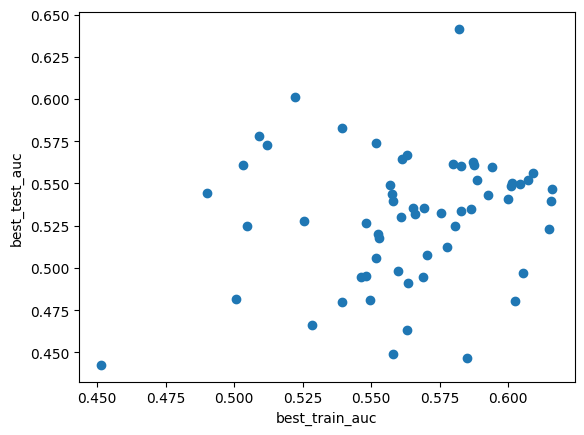

In [35]:
plt.scatter(bdd.best_train_auc, bdd.best_test_auc)
plt.xlabel("best_train_auc")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_val_auc')

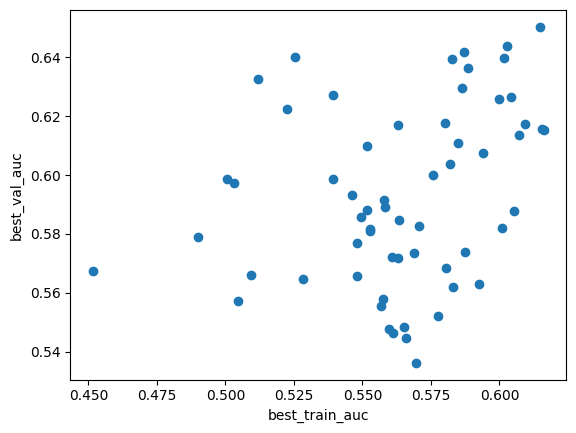

In [36]:
plt.scatter(bdd.best_train_auc, bdd.best_val_auc)
plt.xlabel("best_train_auc")
plt.ylabel("best_val_auc")

Text(0, 0.5, 'criterion')

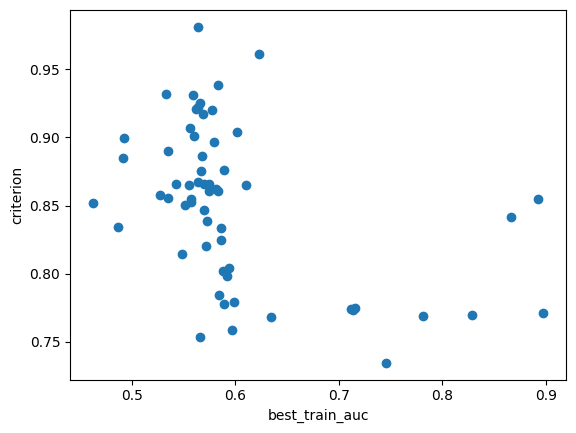

In [37]:
plt.scatter(bdd.train_auc, bdd.criterion)
plt.xlabel("best_train_auc")
plt.ylabel("criterion")

(0.7, 0.8)

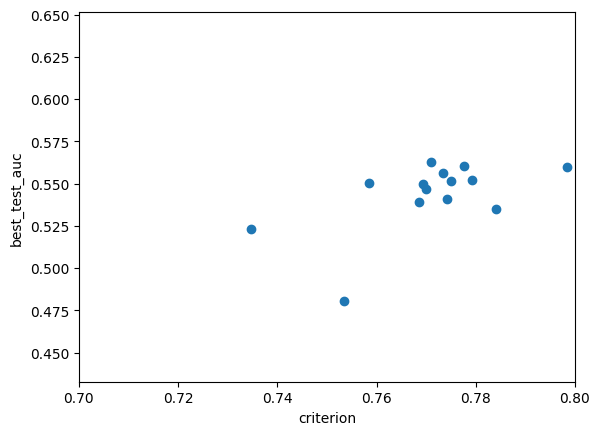

In [38]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")
plt.xlim((0.7,0.8))

(0.75, 0.9)

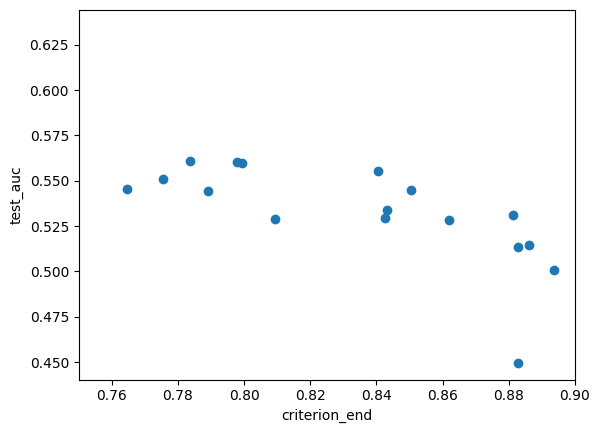

In [39]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")
plt.xlim((0.75,0.9))

Text(0, 0.5, 'best_test_auc')

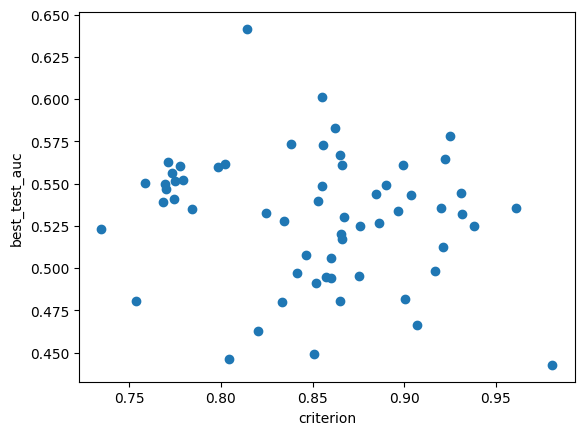

In [40]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

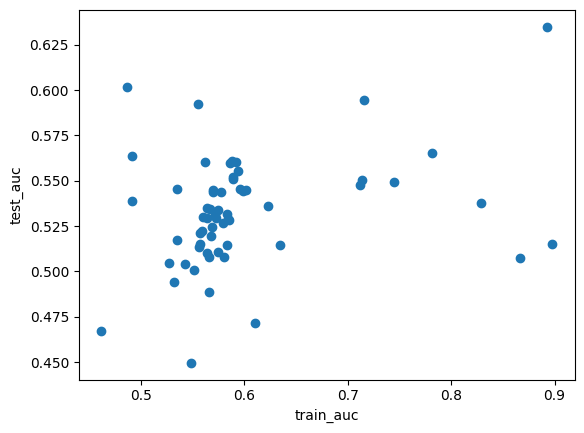

In [41]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

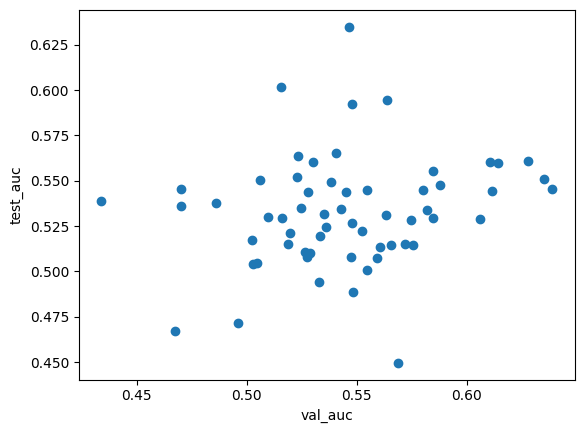

In [42]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

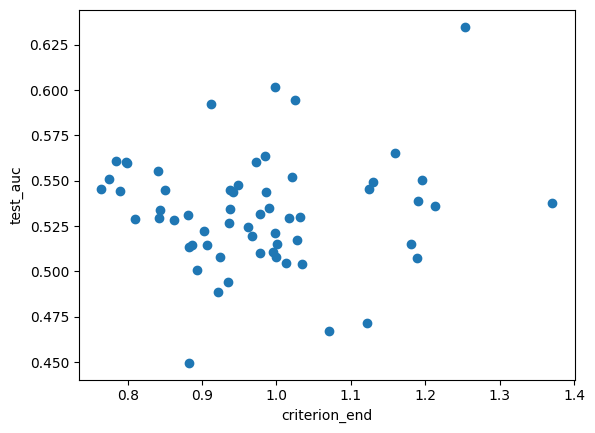

In [43]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")

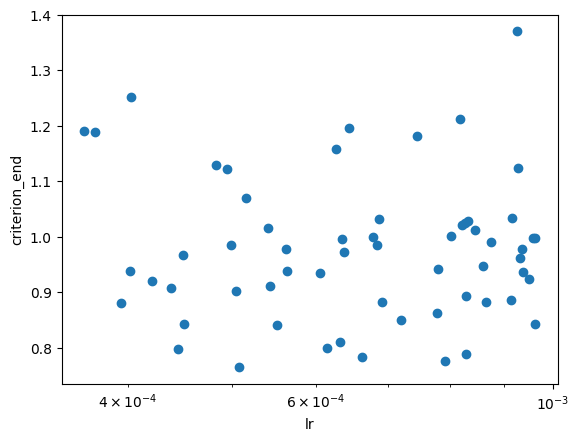

In [44]:
plt.scatter(bdd.lr, bdd.criterion_end)
plt.xlabel("lr")
plt.ylabel("criterion_end")
plt.xscale("log")

Text(0, 0.5, 'criterion_end')

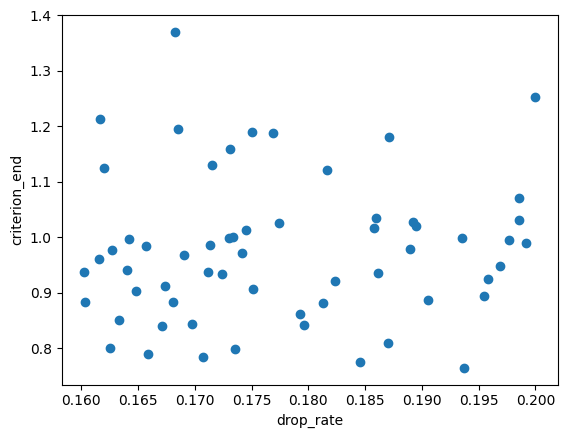

In [45]:
plt.scatter(bdd.drop_rate, bdd.criterion_end)
plt.xlabel("drop_rate")
plt.ylabel("criterion_end")

/tmp/ipykernel_419755/1393031548.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


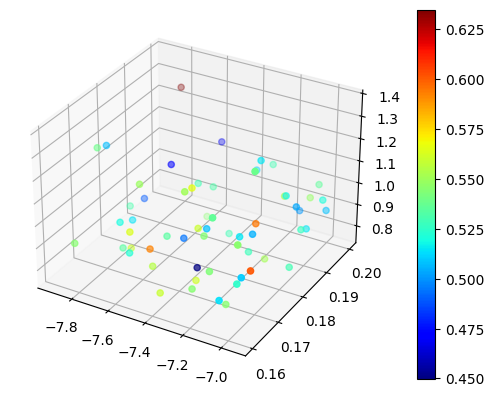

In [46]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
z = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
scat = ax.scatter(np.log(bdd.lr), bdd.drop_rate, z, c=scalarMap.to_rgba(cs))
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_419755/3606356904.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


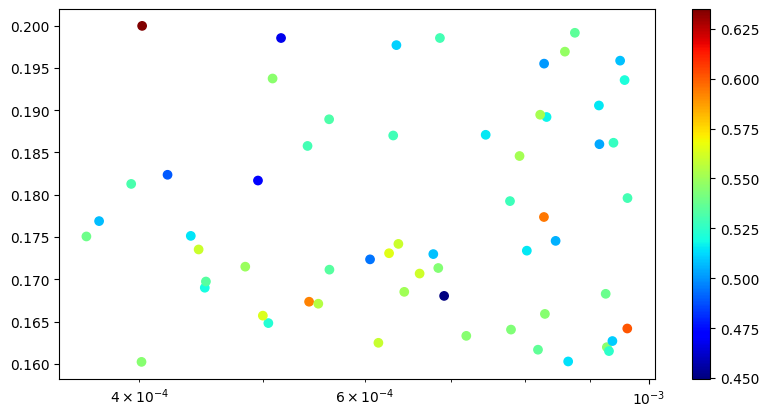

In [47]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_419755/295477420.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


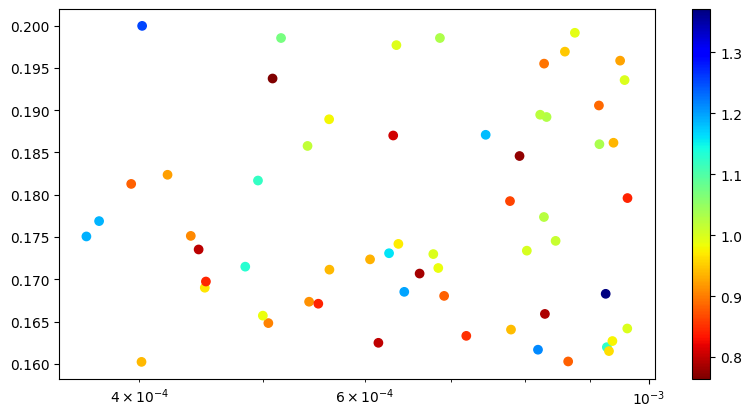

In [48]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet_r'
cm = plt.get_cmap(colorsMap)
cs = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

Text(0, 0.5, 'criterion_end')

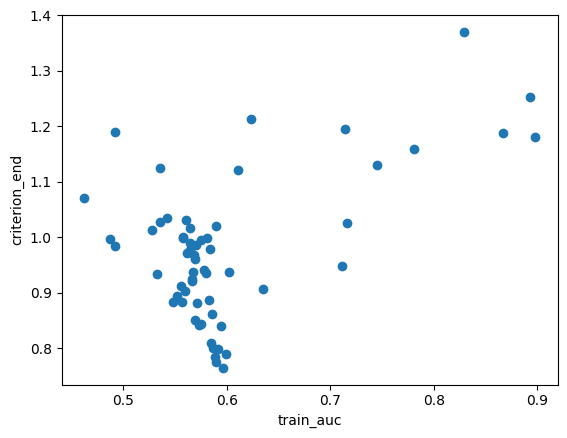

In [49]:
plt.scatter(bdd.train_auc, bdd.criterion_end)
plt.xlabel("train_auc")
plt.ylabel("criterion_end")

Text(0, 0.5, 'val_auc')

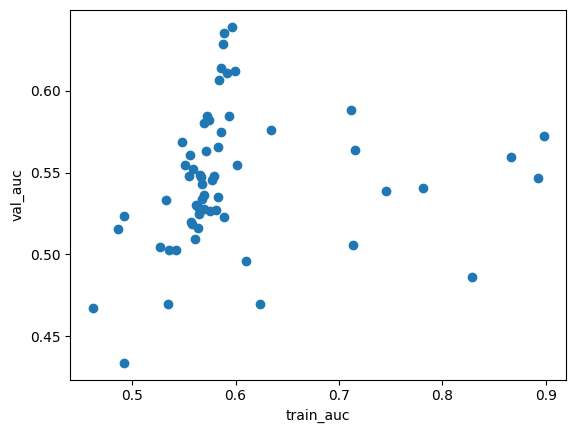

In [50]:
plt.scatter(bdd.train_auc, bdd.val_auc)
plt.xlabel("train_auc")
plt.ylabel("val_auc")

Text(0, 0.5, 'test_auc')

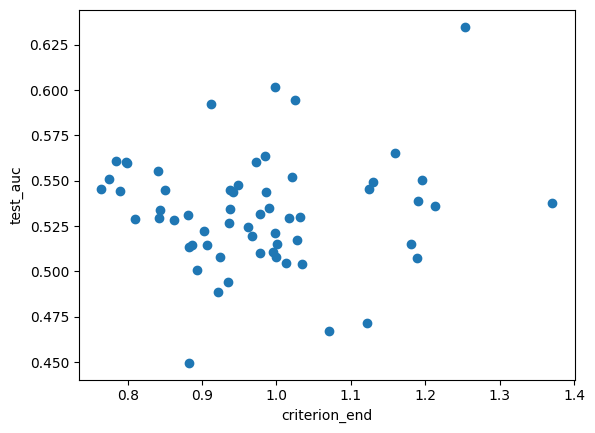

In [51]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")

Text(0, 0.5, 'val_auc')

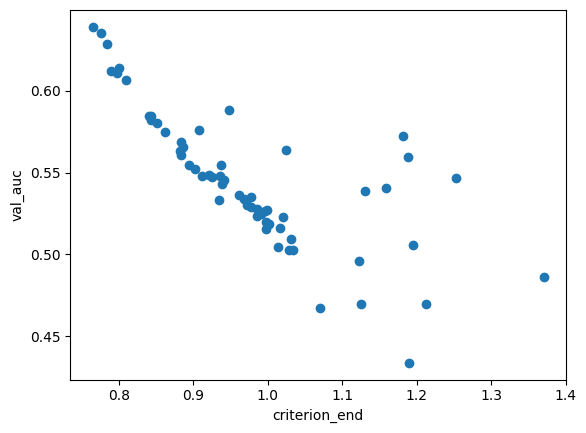

In [52]:
plt.scatter(bdd.criterion_end, bdd.val_auc)
plt.xlabel("criterion_end")
plt.ylabel("val_auc")

Text(0, 0.5, 'train_auc')

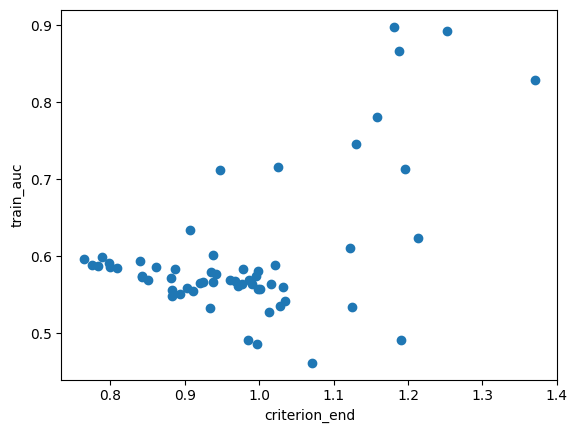

In [53]:
plt.scatter(bdd.criterion_end, bdd.train_auc)
plt.xlabel("criterion_end")
plt.ylabel("train_auc")

In [54]:
bdd.sort_values(by=['criterion_end'], ascending=True)

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,sigma_noise,train_loss,criterion,criterion_end,diff_criterion,diff_best,diff_end,criterion2,diff
31,/volatile2/jc225751/Runs/61_classifier_regress...,0.596473,0.638953,0.545743,0.601565,0.639935,0.550361,0.193741,0.706997,0.000508,0.417369,138.286911,0.758500,0.764575,0.006075,-3.260503,-2.947323,-6.072823,-2.964904
55,/volatile2/jc225751/Runs/61_classifier_regress...,0.589306,0.635352,0.551227,0.582771,0.639607,0.560173,0.184576,0.900516,0.000792,0.388733,138.084366,0.777622,0.775342,0.002280,-2.867585,-2.881591,-5.674471,-3.418205
18,/volatile2/jc225751/Runs/61_classifier_regress...,0.588120,0.628151,0.561039,0.580037,0.617676,0.561328,0.170678,0.867206,0.000662,0.273793,138.482391,0.802287,0.783730,0.018557,-3.279715,-2.995112,-5.776807,-3.505327
58,/volatile2/jc225751/Runs/61_classifier_regress...,0.599087,0.611784,0.544589,0.607049,0.613748,0.552092,0.165904,0.853976,0.000829,0.155085,137.913651,0.779203,0.789129,0.009926,-5.005798,-3.785506,-7.456280,-2.863845
50,/volatile2/jc225751/Runs/61_classifier_regress...,0.591815,0.610475,0.560173,0.594054,0.607529,0.559596,0.173526,0.840312,0.000445,0.305996,138.039276,0.798418,0.797710,0.000708,-4.306927,-3.552275,-6.687784,-3.122345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,/volatile2/jc225751/Runs/61_classifier_regress...,0.491902,0.433879,0.538817,0.503072,0.597381,0.561183,0.175065,0.944032,0.000364,0.455986,138.732666,0.899546,1.190266,0.290719,-2.361178,-2.687902,-4.637913,-3.059147
27,/volatile2/jc225751/Runs/61_classifier_regress...,0.713700,0.506056,0.550649,0.609167,0.617349,0.556421,0.168515,0.834852,0.000644,0.061354,133.071228,0.773484,1.195533,0.422049,-4.805898,-1.524894,-7.299021,-2.827387
59,/volatile2/jc225751/Runs/61_classifier_regress...,0.623229,0.470049,0.535931,0.569408,0.536170,0.535642,0.161673,0.966733,0.000819,0.160544,136.984207,0.960897,1.213082,0.252185,-3.404070,-1.812901,-5.212997,-3.942074
52,/volatile2/jc225751/Runs/61_classifier_regress...,0.892621,0.546645,0.634921,0.601010,0.581997,0.548629,0.199964,0.907358,0.000402,0.070018,122.142357,0.855019,1.252686,0.397667,-3.962641,-1.032893,-6.099683,-2.975742


Text(0, 0.5, 'criterion_end')

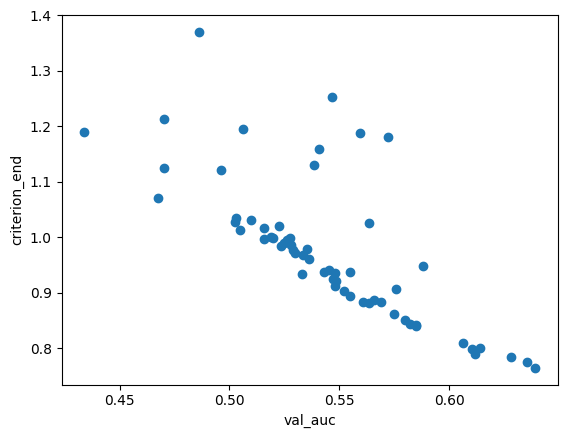

In [55]:
plt.scatter(bdd.val_auc, bdd.criterion_end)
plt.xlabel("val_auc")
plt.ylabel("criterion_end")

Text(0, 0.5, 'test_auc')

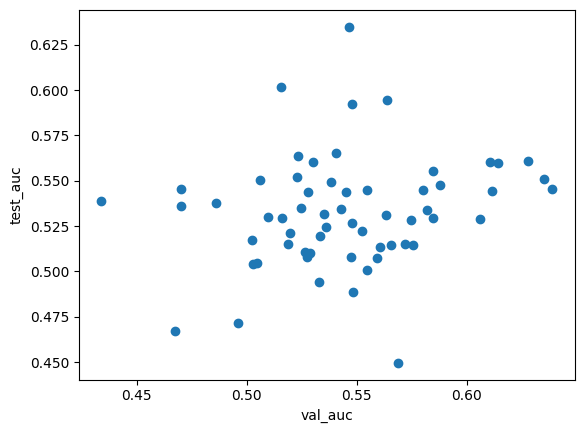

In [56]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")